In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
T=1000
dt=1

def brownian_motion(T, dt, mu, sigma):
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.normal(loc=mu, scale=sigma, size = N)
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    return W

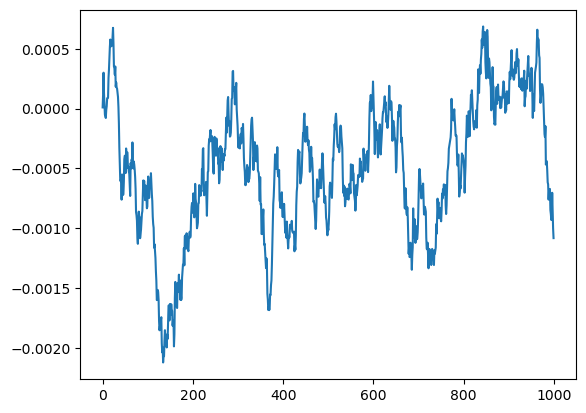

In [67]:
W = brownian_motion(T=T, dt=dt, mu=0, sigma=0.0001)
plt.plot(W)

In [68]:
def geometric_brownian_motion(T, mu, sigma, S0, dt):
        """
        Start = 20
        t, S = GeometricBrownianMotion(T=1000, mu=0.000, sigma=0.04, S0=Start, dt=1)
        """
        N = round(T/dt)
        t = np.linspace(0, T, N)
        W = np.random.standard_normal(size = N)
        W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
        X = (mu-0.5*sigma**2)*t + sigma*W
        S = S0*np.exp(X) ### geometric brownian motion ###
        return t, S

In [73]:
T = 1000
dt = 1
mu_ = brownian_motion(T=T, dt=dt, mu=0.000000, sigma=0.0001)
t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.01, S0=0.06, dt=1)
t, S = geometric_brownian_motion(T=T, mu=mu_, sigma=sigma_, S0=20, dt=1)

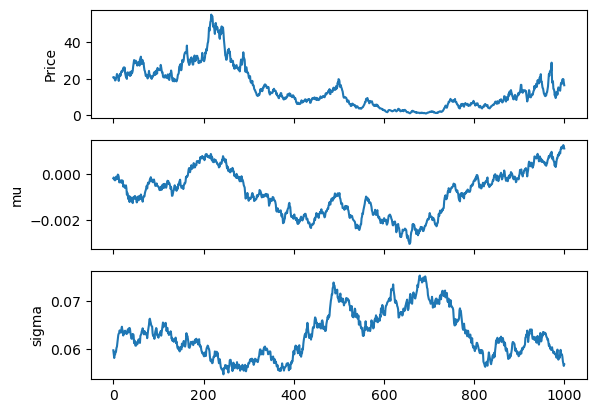

In [74]:
fig, axs = plt.subplots(3)

axs[0].plot(t, S)
axs[0].set_ylabel('Price')
axs[1].plot(t, mu_)
axs[1].set_ylabel('mu')
axs[2].plot(t, sigma_)
axs[2].set_ylabel('sigma')

for ax in axs.flat:
    ax.label_outer()


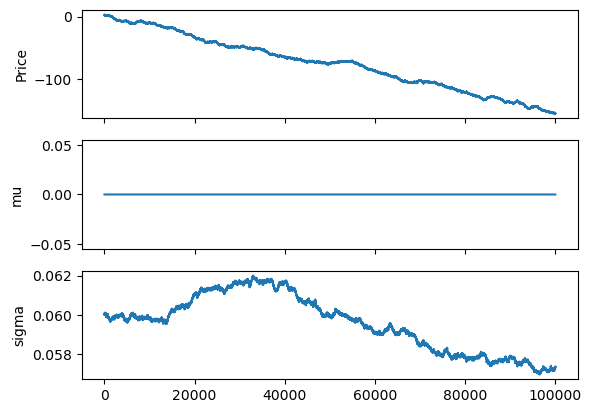

In [118]:
T = 100000
dt = 1
mu_ = brownian_motion(T=T, dt=dt, mu=0.000000, sigma=0.00000)
t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.0001, S0=0.06, dt=1)
t, S = geometric_brownian_motion(T=T, mu=mu_, sigma=sigma_, S0=20, dt=1)
fig, axs = plt.subplots(3)

axs[0].plot(t, np.log(S))
axs[0].set_ylabel('Price')
axs[1].plot(t, mu_)
axs[1].set_ylabel('mu')
axs[2].plot(t, sigma_)
axs[2].set_ylabel('sigma')

for ax in axs.flat:
    ax.label_outer()

In [71]:
paths = 100
T = 1000

all_sigmas = np.zeros((paths, T))
all_mus = np.zeros((paths, T))
all_paths = np.zeros((paths, T))

for i in range(0, paths):
    mu_ = brownian_motion(T=T, dt=dt, mu=0, sigma=0.00001)
    all_mus[i,:] = mu_

for i in range(0, paths):
    t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.01, S0=0.04, dt=1)
    all_sigmas[i,:] = sigma_


for i in range(0, paths):
    t, S = geometric_brownian_motion(T=T,
                                     mu=all_mus[i],
                                     sigma=all_sigmas[i],
                                     S0=20, dt=1)
    all_paths[i,:] = S

print(all_paths)

[[18.69999658 19.31884403 19.39309405 ... 14.7656554  14.11443097
  13.97989685]
 [19.05984022 18.83116132 17.59608643 ...  8.40125699  8.81146863
   8.07439828]
 [20.21227778 21.09547422 20.52875399 ... 10.59082054 10.82776972
  10.98819024]
 ...
 [19.18885325 18.85925635 17.79765561 ... 57.49574106 56.11691761
  53.50904795]
 [20.86344043 20.82544798 20.61229817 ...  8.81540388  7.33858418
   6.76958064]
 [19.88393044 19.1858745  19.04583733 ...  7.72025424  7.74066657
   7.97572076]]


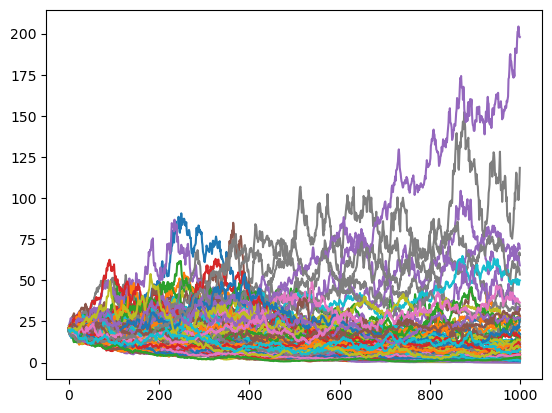

In [72]:
for i in all_paths:
    plt.plot(i)
plt.show()